---

<h2 style="text-align: center;"><b>Python. Занятие 4: Numpy, Scipy</b></h2>

<img align=center src="https://cdn.fedoramagazine.org/wp-content/uploads/2015/11/Python_logo.png" width=400 height=250/>


#### При подготовке ноутбука использовался сайт: http://www.inp.nsk.su/~grozin/python/

---

**NumPy** это open-source модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций. Они объединяются в высокоуровневые пакеты. Они обеспечивают функционал, который можно сравнить с функционалом MatLab. NumPy (Numeric Python) предоставляет базовые методы для манипуляции с большими массивами и матрицами.

## Библиотека NumPy

Пакет **`NumPy`** предоставляет $n$-мерные однородные массивы (все элементы одного типа); в них нельзя вставить или удалить элемент в произвольном месте. В `numpy` реализовано много операций над массивами в целом. Если задачу можно решить, произведя некоторую последовательность операций над массивами, то это будет столь же эффективно, как в `C` или `matlab`, поскольку функции этой библиотеки реализованы на C, и мы просто вызываем из из питона.

### Начало работы
Основным объектом NumPy является однородный многомерный массив (в numpy называется **numpy.ndarray**). Это многомерный массив элементов (обычно чисел), одного типа.

#### Наиболее важные атрибуты объектов ndarray:

**ndarray.ndim** - число измерений (чаще их называют "оси") массива.
 
**ndarray.shape** - размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). Число элементов кортежа shape равно ndim.
 
**ndarray.size** - количество элементов массива. Очевидно, равно произведению всех элементов атрибута shape.
 
**ndarray.dtype** - объект, описывающий тип элементов массива. Можно определить dtype, используя стандартные типы данных Python. NumPy здесь предоставляет целый букет возможностей, как встроенных, например: bool_, character, int8, int16, int32, int64, float8, float16, float32, float64, complex64, object_, так и возможность определить собственные типы данных, в том числе и составные.
 
**ndarray.itemsize** - размер каждого элемента массива в байтах.
 
**ndarray.data** - буфер, содержащий фактические элементы массива. Обычно не нужно использовать этот атрибут, так как обращаться к элементам массива проще всего с помощью индексов.

In [1]:
# стандартное название для импорта numpy - np
import numpy as np
import math

In [2]:
# from numpy import *
# как и влюбом другом языке и библиотке, так делать нельзя. Вы очень быстро запутаетесь в функциях из numpy 
# и запутаете всех, кто читает ваш код

## Векторы и матрицы в numpy

* **Одномерные массивы**. Я предполагаю, что почти все знают про обычные массивы и про операции над ними. Они выглядят следующим образом:

In [3]:
x = [3, 4, 1]
print(x)

[3, 4, 1]


Давайте преобразуем наш массив в __numpy__ массив:

In [4]:
a = np.array(x)
#print(a, type(a))
print(a)

[3 4 1]


`print` печатает массивы в удобной форме.

In [5]:
print(a)
print(a.dtype)
print(a/2)

[3 4 1]
int32
[1.5 2.  0.5]


* **Многомерные массивы**

In [6]:
# Простая матричка
x = [[3, 4, 1],
     [1, 2, 3]]
print(x)

[[3, 4, 1], [1, 2, 3]]


In [7]:
a = np.array(x)
print(a)

[[3 4 1]
 [1 2 3]]


In [8]:
# Реально многомерный массив
x = [
        [ [1, 2, 3], 
         [4, 5, 6]],
        [ [7, 8, 9], 
         [10, 11, 12]] 
    ]
print(x)
print(x[0][0][0])

[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]
1


In [9]:
a = np.array(x)
print( a.shape)
print(a)

print(x[0][0][::-1])

(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[3, 2, 1]


Как мы видим, для numpy нет никакой разницы, сколько измерений у матрицы, все они представляются numpy.ndarray

# Типы данных в numpy

`numpy` предоставляет несколько типов для целых (`int16`, `int32`, `int64`) и чисел с плавающей точкой (`float32`, `float64`).

In [10]:
a.dtype, a.dtype.name, a.itemsize

(dtype('int32'), 'int32', 4)

In [11]:
b = np.array([0., 2, 1])
b.dtype

dtype('float64')

Точно такой же массив.

In [12]:
c = np.array([0.1, 2, 1], dtype=np.float64)

print(c)
print(c.itemsize)

[0.1 2.  1. ]
8


Преобразование данных

In [13]:
print(c.dtype)
print(c.astype(int))
print(c.astype(str))

float64
[0 2 1]
['0.1' '2.0' '1.0']


Так для чего нам нужны эти массивы, почему нам может не хватать возможностей обычных массивов?

# Методы массивов в numpy
Класс `ndarray` имеет много методов.

In [14]:
print(dir(a))

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift_

## Одномерные массивы
* числовые операции и нахождение статистик

In [15]:
x = [1, 2, 5, 3, 4]
a = np.array(x)

In [16]:
# У массивов можно легко и быстро посчитать разные статистики
a.std(), a.sum(), a.prod(), a.min(), a.max(), a.mean()

(1.4142135623730951, 15, 120, 1, 5, 3.0)

In [17]:
# массивы можно умножать и складывать со скалярами и другими массивами, операции проходят поэлементно
a * 2, a / 2, a + 1, a - 1

(array([ 2,  4, 10,  6,  8]),
 array([0.5, 1. , 2.5, 1.5, 2. ]),
 array([2, 3, 6, 4, 5]),
 array([0, 1, 4, 2, 3]))

In [18]:
#ошибка из-за деления на ноль
# not a number
a + a, a * a,  a ** 2, a/a

(array([ 2,  4, 10,  6,  8]),
 array([ 1,  4, 25,  9, 16]),
 array([ 1,  4, 25,  9, 16], dtype=int32),
 array([1., 1., 1., 1., 1.]))

* Поэлементные операции

In [46]:
# В numpy есть почти все функции, которых хватает для построения почти любого расчета
np.exp(a), np.sin(a), np.cos(a), np.round(a) # и много других, лучше просто загуглить, когда вам что-то понадобится

(array([  2.71828183,   7.3890561 , 148.4131591 ,  20.08553692,
         54.59815003]),
 array([ 0.84147098,  0.90929743, -0.95892427,  0.14112001, -0.7568025 ]),
 array([ 0.54030231, -0.41614684,  0.28366219, -0.9899925 , -0.65364362]),
 array([1, 2, 5, 3, 4]))

* сортировка/добавление/удаление элементов массива

In [31]:
b = np.arange(9, -1,-1)
print(f'sorted b {np.sort(b)}')
print(f'original b {b}')
b.sort()
print(f'original b after inplace sort {b}')

sorted b [0 1 2 3 4 5 6 7 8 9]
original b [9 8 7 6 5 4 3 2 1 0]
original b after inplace sort [0 1 2 3 4 5 6 7 8 9]


Функции delete, insert и append не меняют массив на месте, а возвращают новый массив, в котором удалены, вставлены в середину или добавлены в конец какие-то элементы.


In [47]:
a = np.arange(10, -1, -1)
print(a)
a = np.delete(a, [np.arange(5,10,1)])
print(a)

[10  9  8  7  6  5  4  3  2  1  0]
[10  9  8  7  6  0]


In [49]:
a = np.arange(0, 10, 1)
print(a)
a = np.insert(a, [2, 1], [-100, -200])
print(a)

[0 1 2 3 4 5 6 7 8 9]
[   0 -200    1 -100    2    3    4    5    6    7    8    9]


In [51]:
a = np.append(a, [1, 2, 3])
print(a)

[   0 -200    1 -100    2    3    4    5    6    7    8    9    1    2
    3    1    2    3]


## Многомерные массивы

В случае многомерных массивов работает все, что мы только что попробовали для одномерных, но появляются и новые возможности.

* работа с shape массива

У многомерны массивов есть понятие осей (их еще можно назвать измерениями). Так как одни и те же данные могут храниться в массивах разной формы, в numpy есть методы, чтобы эту форму менять

`ndarray.shape` — размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). 

В $n$-мерном случае возвращается кортеж размеров по каждой координате.

In [54]:
x = [[1, 2, 3],
     [4, 5, 6]]
a = np.array(x)
print('shape():', (a.shape),'\nndim():', a.ndim, '\nsize():', a.size, '\nlen():', len(a))
print(a)
print(a.shape[0])
print(a.shape[1])

shape(): (2, 3) 
ndim(): 2 
size(): 6 
len(): 2
[[1 2 3]
 [4 5 6]]
2
3


**Вопрос:** 
 >Как связаны элементы кортежа shape, ndim, size?

**Вопрос:**
>Каковы значения shape, ndim, size, len для картинки RGB 160x100? 

>А для массива из 1000 таких картинок?

**Ответ:**

Для смены shape есть методы reshape, flatten, ravel

In [57]:
print(a)
# reshape
print(a.reshape(3, 2))
# вместо одной из осей можно просто вставить -1, тогда numpy попытается сам понять, какое там должно быть число
print(a.reshape(-1, 2))
# если такое число не получится найти, то будет ошибка
print(a.reshape(-1))

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[1 2]
 [3 4]
 [5 6]]
[1 2 3 4 5 6]


In [59]:
# flatten и ravel очень похожи, они вытягивают матрицу любой размерности в строчку
# Единственно отличие в том, что flatten возвращает копию массива, вытянутую в строчку
# а ravel - просто view(т.е. не происходит реального копирования значений)
# Пример снизу показывает это отличие
flattened = a.flatten()
flattened[0] = 1000
print(a)
print(flattened)
raveled = a.ravel()
raveled[0] = 5
print(a)
print(raveled)

[[5 2 3]
 [4 5 6]]
[1000    2    3    4    5    6]
[[5 2 3]
 [4 5 6]]
[5 2 3 4 5 6]


* Подсчет статистик по осям

In [61]:
print(a)

[[5 2 3]
 [4 5 6]]


In [62]:
# Если не написать axis, то статистика посчиатется по всем массиву
# Если axis=1, то для трехмерной матрицы суммирование (например) будет идти по элементам с индексами (i, *, j)
# Если axis=(1, 2), то для трехмерной матрицы суммирование (например) будет идти по элементам с индексами (i, *, *)
a.std(axis=0), a.sum(axis=0), a.prod(axis=0), a.min(axis=0), a.max(axis=0), a.mean(axis=0)

(array([0.5, 1.5, 1.5]),
 array([9, 7, 9]),
 array([20, 10, 18]),
 array([4, 2, 3]),
 array([5, 5, 6]),
 array([4.5, 3.5, 4.5]))

In [65]:
# Посчитаем, итерируясь по 1 оси
a.std(axis=1), a.sum(axis=1), a.prod(axis=1), a.min(axis=1), a.max(axis=1), a.mean(axis=1)

(array([1.24721913, 0.81649658]),
 array([10, 15]),
 array([ 30, 120]),
 array([2, 4]),
 array([5, 6]),
 array([3.33333333, 5.        ]))

## Булевы массивы
Булевы массивы не настолько особенны, чтобы выделять их в отдельную категорию, но у них есть несколько интересных свойств, которые нам помогут. Булевы массивы естественно возникают в нашей программе при сравнении каких-то двух массивов в numpy (==,>,>=,<,<=).

In [68]:
a = np.array([1, 5, 3])
b = np.array([1, 2, 4])

a == b, a > b, a >= b, a < b, a <= b

(array([ True, False, False]),
 array([False,  True, False]),
 array([ True,  True, False]),
 array([False, False,  True]),
 array([ True, False,  True]))

Посмотрим, что мы можем делать с такими массивами

In [73]:
a = np.array([True, True, True])
b = np.array([False, False, False])

# Логические поэлементные операции
print(f'a and b {a & b}')
print(f'a or b {a | b}')
print(f'not a {~a}')
print(f'a xor b {a ^ b}')

a and b [False False False]
a or b [ True  True  True]
not a [False False False]
a xor b [ True  True  True]


In [75]:
# Логические операции над всеми элементами массива, в них тоже можно использовать параметр axis
# any - хоть одна истина
# all - все истинны
a.any(), a.all(), b.any(), b.all()

(True, True, False, False)

In [77]:
# Если к булевому массиву применить функции, предназначенные только для чисел, 
# то перед применением все True сконвертируются в 1, а False в 0
# Здесь также можно добавить параметр axis
a.mean(), a.max(), a.sum(), a.std()

(1.0, True, 3, 0.0)

### **Задание 1 на булевы массивы:**  
Пусть у нас есть два одномерных массива y_pred - предсказанный нашей моделью класс, и y_true - настоящий класс. Посчитайте accuracy (точность) нашего классификатора на этих данных (долю случаев, в которых реальный класс совпал с предсказанием)

In [81]:
y_pred = np.array([1, 2, 1, 2, 1, 1])
y_true = np.array([1, 2, 1, 1, 1, 1])

# ваш код


# Полезные функции из numpy

Также в numpy есть много полезных методов для получения готовых массивов какого-то вида

* Функция **arange** подобна range. Аргументы могут быть с плавающей точкой. Следует избегать ситуаций, когда (конец−начало)/шаг - целое число, потому что в этом случае включение последнего элемента зависит от ошибок округления. Лучше, чтобы конец диапазона был где-то посредине шага.

In [82]:
# поиграемся с питоновским методом range
print(list(range(8)))
print(*range(0, 8))
print(*[2,5])
print(2,5)

[0, 1, 2, 3, 4, 5, 6, 7]
0 1 2 3 4 5 6 7
2 5
2 5


In [83]:
# в нем нельзя использовать не целый шаг
print(*range(0, 8, 0.5))

TypeError: 'float' object cannot be interpreted as an integer

In [88]:
# перейдем к arange
# здесь не целый шаг использовать уже можно
print(type(np.arange(0, 8)))
print(np.arange(0, -8, -0.5))

<class 'numpy.ndarray'>
[ 0.  -0.5 -1.  -1.5 -2.  -2.5 -3.  -3.5 -4.  -4.5 -5.  -5.5 -6.  -6.5
 -7.  -7.5]


In [90]:
print(np.arange(0, 8, 0.5))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5]


Но самое главное:

In [92]:
%time np.arange(0, 50000000)
%time list(range(0, 50000000))
%time range(0, 50000000)


Wall time: 120 ms
Wall time: 1.04 s
Wall time: 988 µs


range(0, 50000000)

**Вопрос на знание питона**: почему просто range занял 12 мкс, даже меньше, чем numpy?

* Еще один метод, похожий на arange это **linspace**. С его помощью можно создавать последовательности чисел с постоянным шагом. Начало и конец диапазона включаются; последний аргумент - число точек.

In [96]:
%time a = np.linspace(0, 8, 10)
%time print(a)

Wall time: 0 ns
[0.         0.88888889 1.77777778 2.66666667 3.55555556 4.44444444
 5.33333333 6.22222222 7.11111111 8.        ]
Wall time: 0 ns


* **Быстродействие**. Массивы, разумеется, можно использовать в `for` циклах. Но при этом теряется главное преимущество `numpy` - быстродействие. Всегда, когда это возможно, лучше использовать операции, определенные в numpy.

In [100]:
%%time 
res = a + a
print(res)

[ 0.          1.77777778  3.55555556  5.33333333  7.11111111  8.88888889
 10.66666667 12.44444444 14.22222222 16.        ]
Wall time: 997 µs


In [101]:
%%time
res = []
for value in a:
    res.append(value + value)
print(res)

[0.0, 1.7777777777777777, 3.5555555555555554, 5.333333333333333, 7.111111111111111, 8.88888888888889, 10.666666666666666, 12.444444444444443, 14.222222222222221, 16.0]
Wall time: 0 ns


(в совсем простых операциях, таких как сложение двух чисел, питон не уступает в скорости C++ или C, а поэтому использование numpy не дает ввыигрыша, но в более тяжелых вычислениях разница становится колоссальнной)

* Еще один способ создавать стандартные массивы - __`numpy.eye(N, M=None, ...)`__, __`numpy.zeros(shape, ...)`__, __`numpy.ones(shape, ...)`__.

Первая функция создает единичную матрицу размера $N \times M$; если $M$ не задан, то $M = N$. 

Вторая и третья функции создают матрицы, состоящие целиком из нулей или единиц соответственно. В качестве первого аргумента необходимо задать размерность массива — кортеж целых чисел. В двумерном случае это набор из двух чисел: количество строк и столбцов матрицы.

__Примеры:__

In [104]:
b = np.eye(5)
print("Единичная матрица:\n", b)

Единичная матрица:
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [106]:
c = np.ones((2, 5, 7))
print("Матрица, состоящая из одних единиц:\n", c)

Матрица, состоящая из одних единиц:
 [[[1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]]]


__Обратите внимание: размерность массива задается не двумя аргументами функции, а одним — кортежем!__ 

Вот так —  __`np.ones(7, 5)`__ — создать массив не получится, так как функции в качестве параметра `shape` передается `7`, а не кортеж `(7, 5)`.

### **Задание 2.**  
Создайте матрицу размера 4х5, у которой все элементы стоящие на диагонали равны -1, а все остальные равны 0.5

In [107]:
# ваш код здесь


# Slices, Fancy Indexing and stuff

* Обращение по слайсам

Так же как и для обычных листов, для numpy массивов доступно обращение по слайсам (a[2:5:2], 2:5:2 - слайс). Но есть одно отличие. В numpy можно писать несколько слайсов через запятую, чтобы сделать _срез_ сразу по нескольким осям - a[2:5, 1:4]. 

In [110]:
import numpy as np
a = np.array([
                [1, 2, 3, 4],
                [5, 6, 7, 8],
                [9, 10, 11, 12]
             ])
print(a)
print(a[0:2, 1:3])
print(a[0::2, 1::2])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]
[[ 2  4]
 [10 12]]


* Обращение по индексам

в numpy можно обращаться сразу к нескольким элементам массива, которые не идут подряд, передав в качестве аргумента list или numpy array индексов

In [112]:
a = np.array([0, 1, 2, 3])
a[0], a[[0, 1, 1, 2]], a[np.array([0, 1, 1, 2])]

(0, array([0, 1, 1, 2]), array([0, 1, 1, 2]))

In [114]:
import numpy as np
# многомерный случай
z = np.array([[1,2], [3,4]])
print(z)
# можно передать лист с индексами для каждого из измерений. 
# В данном случае выберутся элементы с индексами (0, 0) и (1, 1). Результат - одномерный массив
# короч индексы будут читаться симметрично
print(z[[0,1], [0,0]])

[[1 2]
 [3 4]]
[1 3]


* Обращение по булевому массиву

In [119]:
print(a)
print(a[[True, False, True, True]])
# Как мы уже выяснили, в результате сравнения numpy массивов получается булев массив, 
# его очень удобно использовать, чтобы обращаться к элементам, удовлетворяющим какому-то условию
print(a[a > 1])
print(a[a >= 1])

[0 1 2 3]
[0 2 3]
[2 3]
[1 2 3]


* Присвоение значений во view

Когда мы используем слайсы для выборки каких-то элементов массива, нам возвращается не новый массив с этими элементами, а просто объект view, который ссылается на какие-то ячейки в реальном массиве. Поэтому мы можем сделать так:

In [121]:
a = np.array([1, 2, 3])
b = a[0:2]
print(b)
b[0] = 100
b[1] = 50
print(b)
print(a)

[1 2]
[100  50]
[100  50   3]


Изменив элемент во view b, мы поменяли элемент и в массиве а. Если же обратиться по списку координат или булевому массиву, так не получится

In [122]:
a = np.array([1, 2, 3])
b = a[[0, 1]]
print(b)
b[0] = 50
print(b)
print(a)

[1 2]
[50  2]
[1 2 3]


In [123]:
a = np.array([1, 2, 3])
b = a[[True, True, False]]
print(b)
b[0] = 100
print(b)
print(a)

[1 2]
[100   2]
[1 2 3]


Означает ли это, что не сработают выражения вида:
> a[[0, 1]] = 100

> a[[True, True, False]] = 100

Присваивания сработают, потому что в данном случае копия массива создаваться не будет, вместо этого вызовется магический метод питона \_\_setitem\_\_. Очень удобная особенность питона, про которую не стоит забывать.

In [124]:
a = np.array([1, 2, 3])
a[[True, True, False]] = 100
print(a)

[100 100   3]


Если же слева будет не просто обращение по индексу, а двойное обращение по индексу, то питону придется вычислить значение 
> a[[True, True, False]]

тем самым создав копию, и только потом взять у него нулевой элемент. Поэтому 0 присвоится в массив-копию, который тут же уничтожится.

In [125]:
a = np.array([1, 2, 3])
a[[True, True, False]][0] = 100
print(a)

[1 2 3]


### **Задание 3 на slicing:**
Создайте матрицу 4х4, у которой элементы i=4-j равны 1, а остальные - нулю

In [126]:
# ваш код здесь

## Случайные значения

In [127]:
?np.random

In [134]:
a=np.random.uniform(0, 1)
b=np.random.randn(2, 3)+10
c=np.random.rand(2, 3)
print(a,b,c, sep='\n')

0.9827027628771865
[[10.04192587  9.3494167  12.45263705]
 [10.50177038 10.56403844  9.9872751 ]]
[[0.35594354 0.41495663 0.05853236]
 [0.67533884 0.89258808 0.00741164]]


# Линейная Алгебра

До этого мы рассматривали разные операции numpy, которые не связаны напрямую с линейной алгеброй.

* Скалярное произведение 
$a~\cdot~b = (a_1, a_2, .., a_n) \cdot (b_1, b_2, .., b_n) = a_1b_1 + a_2b_2 + .. + b_nb_n = \sum_{i=1}^{n} a_ib_i$:


In [135]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
print(a,b)

[1 2 3] [2 3 4]


In [138]:
a @ b

20

In [140]:
print(np.matmul(a, b))

20


* Векторы и матрицы

In [141]:
b = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

Наш 2-мерный массив __b__, также его можно назвать матрицей, имеет 2 строки и 3 столбца.
То есть наша матрица состоит из 2 вектор-строк:

In [142]:
print(b)
b[0:2,0:1]

[[1 2 3]
 [4 5 6]]


array([[1],
       [4]])

In [143]:
b[1:2]

array([[4, 5, 6]])

Обычно в линейной алгебре под любым вектором подразумевается вектор-столбец. Наша матрица содержит 3 вектор-стобца:

In [144]:
b[:, 0:1]

array([[1],
       [4]])

In [145]:
b[:, 1:2]

array([[2],
       [5]])

In [146]:
b[:, 2:3]

array([[3],
       [6]])

## Операции с матрицами

In [147]:
A = np.array([[1, 0], [0, 1]])
B = np.array([[4, 1], [2, 2]])

__Напоминание теории.__ __Транспонированной матрицей__ $A^{T}$ называется матрица, полученная из исходной матрицы $A$ заменой строк на столбцы. Формально: элементы матрицы $A^{T}$ определяются как $a^{T}_{ij} = a_{ji}$, где $a^{T}_{ij}$ — элемент матрицы $A^{T}$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

В `NumPy` транспонированная матрица вычисляется с помощью функции __`numpy.transpose()`__ или с помощью _метода_ __`array.T`__, где __`array`__ — нужный двумерный массив.

In [149]:
a = np.array([[1, 2], [3, 4]])
b = np.transpose(a)
c = a.T

In [150]:
print("Матрица:\n", a)
print("Транспонирование функцией:\n", b)
print("Транспонирование методом:\n",  c)

Матрица:
 [[1 2]
 [3 4]]
Транспонирование функцией:
 [[1 3]
 [2 4]]
Транспонирование методом:
 [[1 3]
 [2 4]]


In [151]:
a @ b

array([[ 5, 11],
       [11, 25]])

__Напоминание теории.__ Операция __умножения__ определена для двух матриц, таких что число столбцов первой равно числу строк второй. 

Пусть матрицы $A$ и $B$ таковы, что $A \in \mathbb{R}^{n \times k}$ и $B \in \mathbb{R}^{k \times m}$. __Произведением__ матриц $A$ и $B$ называется матрица $C$, такая что $c_{ij} = \sum_{r=1}^{k} a_{ir}b_{rj}$, где $c_{ij}$ — элемент матрицы $C$, стоящий на пересечении строки с номером $i$ и столбца с номером $j$.

В `NumPy` произведение матриц вычисляется с помощью функции __`numpy.dot(a, b, ...)`__ или с помощью _метода_ __`array1.dot(array2)`__, где __`array1`__ и __`array2`__ — перемножаемые матрицы.

#### Линейная алгебра (модуль `np.linalg`)zxxz

* Решение линейной системы __$Ax=b$__:

In [152]:
y = np.array([1, 0])
z = np.dot(A, y)
print(y, z, A,sep='\n')

[1 0]
[1 0]
[[1 0]
 [0 1]]


In [155]:
A = np.array([[2,6],[3,-4]])
B = np.array([5,8])
x = np.linalg.solve(A, B)
print(x)

[ 2.61538462 -0.03846154]


### Библиотека SciPy

* Оптимизация функции (нахождение минимума/максимума):

In [156]:
from scipy.optimize import minimize

Обязательно посмотрите документацию, сходу не очевидно, как именно использовать:

In [157]:
?minimize

Опмтимизируем (минимизируем) простую функцию:

In [158]:
def f(x):
    return x ** 2

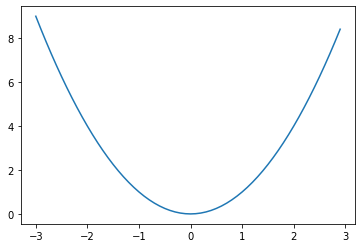

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 3, .1)
y = f(x)

plt.plot(x,y)
# plt.show()

In [160]:
res = minimize(f, x0=100)

In [161]:
res

      fun: 5.552074997367714e-17
 hess_inv: array([[0.50000004]])
      jac: array([-1.28826571e-12])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-7.45122473e-09])

Тут нужно смотреть на 4 строчки: `fun, message, success и x`  
`fun` - значние функции в точке минимума  
`message` - служебное сообщение об окончании процесса (может быть "успешно", как здесь, или сообщение о том, что что-то пошло не так ("не сошлось"))  
`success` - True, если успешно сошлось (но лучше всегда всё же смотреть и `message`)  
`x` - точка, в которой достигается минимум

Можно в аргумент `method` подавать разные ключевые слова для смены метода оптимизации, подробнее о них лучше читать документацию или погуглить.

* Интегрирование:

In [162]:
from scipy.integrate import quad, odeint
from scipy.special import erf

In [163]:
def f(x):
    return np.exp(-x ** 2)
?erf  

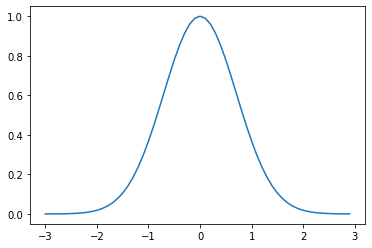

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(-3, 3, .1)
y = f(x)

plt.plot(x,y);
# plt.show()

Адаптивное численное интегрирование (может быть до бесконечности). `err` - оценка ошибки.

In [165]:
res, err = quad(f, 0, np.inf)
print(np.sqrt(np.pi) / 2, res, err)

0.8862269254527579 0.8862269254527579 7.101318390915439e-09


In [166]:
res, err = quad(f, 0, 1)
print(np.sqrt(np.pi) / 2 * erf(1), res, err)
?erf

0.7468241328124269 0.7468241328124271 8.291413475940725e-15


## Поиграем с изображением
Изображение - это тензор. Загрузим картинку из сети.

In [167]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://sun9-45.userapi.com/c639425/v639425538/5e59/NC6LnBbLGlQ.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [169]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

Код выше был скопирован с гугла и не представляет для нас большого интереса. Главное - получить изображение в формате numpy:

In [170]:
img = np.array(img)
img.shape

(455, 264, 3)

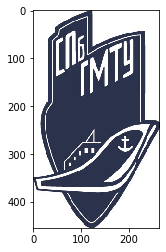

In [171]:
from matplotlib import pyplot as plt
plt.imshow(img)

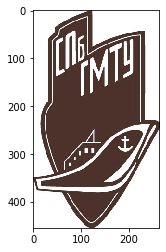

In [172]:
img2 = img[:, :, ::-1]
plt.imshow(img2)

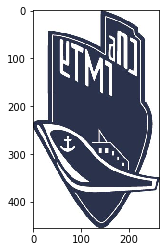

In [174]:
img3 = img[:, ::-1]
plt.imshow(img3)

In [175]:
batch = np.concatenate([img[None, :, :, :], img2[None, :, :, :], img3[None, :, :, :]])
batch.shape

(3, 455, 264, 3)

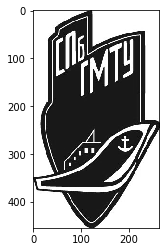

In [176]:
img4 = img.sum(axis=2)
plt.imshow(img4, cmap=plt.cm.gray)

In [177]:
img4.shape

(455, 264)

### Задание 4. Простые задачки для самостоятельного выполнения
Почти для каждой задачи существует +/- однострочное решение. Гуглите.
1. С помощью какой команды можно узнать число строк в матрице?
1. С помощью какой команды вывести последний элемент из списка?
1. Какой результат выполнения команды: ['a','b','c'] + [1,2,3]
1. Даны два вектора a=[1,2,3,4], b=[5,6,7]. С помощью какой команды можно построить вектор [1,2,3,4,5,6,7].
1. Дан вектор [1,2,3,4,5]. С помощью какой команды можно изменить последовательность значений в векторе?
1. С помощью каких команд можно создать матрицу 5x5, границы у которой равны 1, а остальные элементы равны 0?
1. Дана матрица NumPy элементов: [[1,2,3], [4,5,6], [7,8,9]]. С помощью какой команды можно выделить диагональные элементы?
1. Создать вектор со значениями от 10 до 49
1. Найти индексы ненулевых элементов в [1,2,0,0,4,0]
1. Создать массив 10x10 со случайными значениями, найти минимум и максимум
1. Дан массив 10x2 (точки в декартовой системе координат), преобразовать в полярную
1. Заменить максимальный элемент на ноль


Полезные функции NumPy: 
> np.zeros, np.ones, np.diag, np.eye, np.arange, np.linspace, np.meshgrid, np.random.random, np.random.randint, np.shape, np.reshape, np.transpose, np.any, np.all, np.nonzero, np.where, np.sum, np.cumsum, np.prod, np.diff, np.min, np.max, np.minimum, np.maximum, np.argmin, np.argmax, np.unique, np.sort, np.argsort, np.bincount, np.ravel, np.newaxis, np.dot, np.linalg.inv, np.linalg.solve. Многие из этих функций можно использовать так: x.argmin().

## Список материалов для самостоятельного изучения

*Статья на Хабре по основам NumPy - https://habr.com/post/121031/*  

*Еще одна статья https://habr.com/ru/post/469355/*

*100 задач по NumPy для любителей посидеть вечерком за чашечкой программирования* - https://pythonworld.ru/numpy/100-exercises.html  

*Очень крутой, продвинутый ноутбук по NumPy* - https://nbviewer.jupyter.org/github/vlad17/np-learn/blob/master/presentation.ipynb

*Лекции по SciPy и NumPy* - http://www.scipy-lectures.org/index.html